# 1. Comprensión de los Datos - Mundial de Fútbol

Este notebook corresponde a la fase de comprensión de datos del proceso CRISP-DM. Exploraremos el dataset de partidos de la Copa del Mundo para entender su estructura y contenido.

In [5]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Configuración de visualización
%matplotlib inline
# Usar un estilo compatible con versiones nuevas
plt.style.use('seaborn-v0_8-whitegrid')  # Alternativa: simplemente usar 'seaborn'
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_palette('viridis')

# Configuración de pandas
pd.set_option('display.max_columns', 100)

## 1.1 Carga de Datos

Primero cargamos el archivo JSON con los datos de los partidos del Mundial.

In [6]:
# Ruta al archivo JSON
json_path = '../data/raw/matches_World_Cup.json'

# Cargar el archivo JSON
with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Verificar el tipo de datos cargados
print(f"Tipo de datos: {type(data)}")

# Si es una lista, mostrar la cantidad de elementos
if isinstance(data, list):
    print(f"Número de elementos: {len(data)}")
    
# Si es un diccionario, mostrar las claves principales
elif isinstance(data, dict):
    print(f"Claves principales: {list(data.keys())}")

Tipo de datos: <class 'list'>
Número de elementos: 64


## 1.2 Exploración de la Estructura

Vamos a explorar la estructura del JSON para entender cómo están organizados los datos.

In [7]:
# Examinar la estructura del primer elemento (si es una lista)
if isinstance(data, list) and len(data) > 0:
    first_item = data[0]
    print("Estructura del primer elemento:")
    print(json.dumps(first_item, indent=2)[:1000] + "..." if len(json.dumps(first_item, indent=2)) > 1000 else json.dumps(first_item, indent=2))
    
    # Mostrar las claves del primer elemento
    if isinstance(first_item, dict):
        print(f"\nClaves del primer elemento: {list(first_item.keys())}")
        
# Si es un diccionario, explorar su estructura
elif isinstance(data, dict):
    print("Estructura del diccionario:")
    for key, value in data.items():
        if isinstance(value, list):
            print(f"{key}: Lista con {len(value)} elementos")
            if len(value) > 0 and isinstance(value[0], dict):
                print(f"  Claves del primer elemento: {list(value[0].keys())}")
        elif isinstance(value, dict):
            print(f"{key}: Diccionario con claves {list(value.keys())}")
        else:
            print(f"{key}: {type(value).__name__}")

Estructura del primer elemento:
{
  "status": "Played",
  "roundId": 4165368,
  "gameweek": 0,
  "teamsData": {
    "9598": {
      "scoreET": 0,
      "coachId": 122788,
      "side": "away",
      "teamId": 9598,
      "score": 2,
      "scoreP": 0,
      "hasFormation": 1,
      "formation": {
        "bench": [
          {
            "playerId": 69964,
            "assists": "0",
            "goals": "null",
            "ownGoals": "0",
            "redCards": "0",
            "yellowCards": "0"
          },
          {
            "playerId": 69353,
            "assists": "0",
            "goals": "null",
            "ownGoals": "0",
            "redCards": "0",
            "yellowCards": "0"
          },
          {
            "playerId": 212604,
            "assists": "0",
            "goals": "null",
            "ownGoals": "0",
            "redCards": "0",
            "yellowCards": "0"
          },
          {
            "playerId": 69400,
            "assists": "0",
     

In [10]:
# Examinar en detalle la estructura de los datos para encontrar información de jugadores
if isinstance(data, list) and len(data) > 0:
    print("Examinando estructura detallada del primer partido...")
    first_match = data[0]
    
    # Verificar claves disponibles
    print(f"Claves disponibles en el primer partido: {list(first_match.keys())}")
    
    # Buscar patrones comunes donde podrían estar los jugadores
    for key in first_match.keys():
        if isinstance(first_match[key], dict):
            print(f"Contenido de '{key}' (dict): {list(first_match[key].keys())}")
        elif isinstance(first_match[key], list):
            print(f"Contenido de '{key}' (list): {len(first_match[key])} elementos")
            if len(first_match[key]) > 0:
                print(f"  Tipo del primer elemento: {type(first_match[key][0])}")
                if isinstance(first_match[key][0], dict):
                    print(f"  Claves: {list(first_match[key][0].keys())}")

Examinando estructura detallada del primer partido...
Claves disponibles en el primer partido: ['status', 'roundId', 'gameweek', 'teamsData', 'seasonId', 'dateutc', 'winner', 'venue', 'wyId', 'label', 'date', 'groupName', 'referees', 'duration', 'competitionId']
Contenido de 'teamsData' (dict): ['9598', '4418']
Contenido de 'referees' (list): 4 elementos
  Tipo del primer elemento: <class 'dict'>
  Claves: ['refereeId', 'role']


## 1.3 Conversión a DataFrames

Ahora que conocemos la estructura del JSON, vamos a convertir los datos a DataFrames para facilitar su análisis.

In [8]:
# Función para convertir datos de partidos a DataFrame
def extract_matches_dataframe(data):
    matches = []
    
    if isinstance(data, list):
        # Si es una lista de partidos
        for match in data:
            if isinstance(match, dict):
                # Extraer información básica del partido
                match_info = {}
                
                # Incluir campos simples (no listas ni diccionarios)
                for key, value in match.items():
                    if not isinstance(value, (dict, list)):
                        match_info[key] = value
                
                # Añadir información de equipos si está disponible
                if 'home_team' in match and isinstance(match['home_team'], dict):
                    home_team = match['home_team']
                    if 'name' in home_team:
                        match_info['home_team_name'] = home_team['name']
                    if 'score' in home_team:
                        match_info['home_score'] = home_team['score']
                
                if 'away_team' in match and isinstance(match['away_team'], dict):
                    away_team = match['away_team']
                    if 'name' in away_team:
                        match_info['away_team_name'] = away_team['name']
                    if 'score' in away_team:
                        match_info['away_score'] = away_team['score']
                
                matches.append(match_info)
    
    # Crear DataFrame
    if matches:
        matches_df = pd.DataFrame(matches)
        print(f"DataFrame de partidos creado con {len(matches_df)} filas y {len(matches_df.columns)} columnas")
        return matches_df
    else:
        print("No se pudo extraer información de partidos")
        return pd.DataFrame()

# Extraer DataFrame de partidos
matches_df = extract_matches_dataframe(data)

# Mostrar las primeras filas
matches_df.head()

DataFrame de partidos creado con 64 filas y 13 columnas


,status,roundId,gameweek,seasonId,dateutc,winner,venue,wyId,label,date,groupName,duration,competitionId
0,Played,4165368,0,10078,2018-07-15 15:00:00,4418,Olimpiyskiy stadion Luzhniki,2058017,"France - Croatia, 4 - 2","July 15, 2018 at 5:00:00 PM GMT+2",,Regular,28
1,Played,4165367,0,10078,2018-07-14 14:00:00,5629,Stadion Krestovskyi,2058016,"Belgium - England, 2 - 0","July 14, 2018 at 4:00:00 PM GMT+2",,Regular,28
2,Played,4165366,0,10078,2018-07-11 18:00:00,9598,Olimpiyskiy stadion Luzhniki,2058015,"Croatia - England, 2 - 1 (E)","July 11, 2018 at 8:00:00 PM GMT+2",,ExtraTime,28
3,Played,4165366,0,10078,2018-07-10 18:00:00,4418,Stadion Krestovskyi,2058014,"France - Belgium, 1 - 0","July 10, 2018 at 8:00:00 PM GMT+2",,Regular,28
4,Played,4165365,0,10078,2018-07-07 18:00:00,9598,Olimpiyskiy Stadion Fisht,2058012,"Russia - Croatia, 2 - 2 (P)","July 7, 2018 at 8:00:00 PM GMT+2",,Penalties,28


In [13]:
# Función para convertir datos de jugadores a DataFrame
def extract_players_dataframe(data):
    players = []
    
    if isinstance(data, list):
        # Iterar por cada partido
        for match in data:
            match_id = match.get('wyId', None)  # Usar wyId como identificador del partido
            match_date = match.get('date', None)  # Fecha del partido
            
            # Los jugadores están dentro de 'formation' en 'teamsData'
            if 'teamsData' in match and isinstance(match['teamsData'], dict):
                for team_id, team_data in match['teamsData'].items():
                    team_side = team_data.get('side', None)  # home/away
                    team_score = team_data.get('score', None)
                    
                    if 'formation' in team_data and isinstance(team_data['formation'], dict):
                        formation = team_data['formation']
                        
                        # Procesar jugadores titulares
                        if 'lineup' in formation and isinstance(formation['lineup'], list):
                            for player in formation['lineup']:
                                if isinstance(player, dict):
                                    player_info = player.copy()
                                    player_info['match_id'] = match_id
                                    player_info['match_date'] = match_date
                                    player_info['team_id'] = team_id
                                    player_info['team_side'] = team_side
                                    player_info['is_lineup'] = True
                                    player_info['is_bench'] = False
                                    players.append(player_info)
                        
                        # Procesar jugadores suplentes
                        if 'bench' in formation and isinstance(formation['bench'], list):
                            for player in formation['bench']:
                                if isinstance(player, dict):
                                    player_info = player.copy()
                                    player_info['match_id'] = match_id
                                    player_info['match_date'] = match_date
                                    player_info['team_id'] = team_id
                                    player_info['team_side'] = team_side
                                    player_info['is_lineup'] = False
                                    player_info['is_bench'] = True
                                    players.append(player_info)
    
    # Crear DataFrame
    if players:
        players_df = pd.DataFrame(players)
        print(f"DataFrame de jugadores creado con {len(players_df)} filas y {len(players_df.columns)} columnas")
        return players_df
    else:
        print("No se pudo extraer información de jugadores")
        return pd.DataFrame()

# Extraer DataFrame de jugadores
players_df = extract_players_dataframe(data)

# Mostrar las primeras filas
if not players_df.empty:
    players_df.head()

DataFrame de jugadores creado con 2885 filas y 12 columnas


## 1.4 Análisis Exploratorio de Datos (EDA)

Ahora que tenemos los datos en formato DataFrame, vamos a realizar un análisis exploratorio para entender mejor su contenido y calidad.

### 1.4.1 Información General de los DataFrames

In [14]:
# Información del DataFrame de partidos
print("Información del DataFrame de partidos:")
matches_df.info()

Información del DataFrame de partidos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status         64 non-null     object
 1   roundId        64 non-null     int64 
 2   gameweek       64 non-null     int64 
 3   seasonId       64 non-null     int64 
 4   dateutc        64 non-null     object
 5   winner         64 non-null     int64 
 6   venue          64 non-null     object
 7   wyId           64 non-null     int64 
 8   label          64 non-null     object
 9   date           64 non-null     object
 10  groupName      64 non-null     object
 11  duration       64 non-null     object
 12  competitionId  64 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 6.6+ KB


In [15]:
# Estadísticas descriptivas de los partidos
matches_df.describe()

,roundId,gameweek,seasonId,winner,wyId,competitionId
count,6.400000e+01,64.000000,64.0,64.000000,6.400000e+01,64.0
mean,4.165363e+06,1.500000,10078.0,8203.500000,2.057986e+06,28.0
std,1.038806e+00,1.126872,0.0,5684.474347,1.861899e+01,0.0
min,4.165363e+06,0.000000,10078.0,0.000000,2.057954e+06,28.0
25%,4.165363e+06,0.750000,10078.0,4418.000000,2.057970e+06,28.0
50%,4.165363e+06,1.500000,10078.0,7047.000000,2.057986e+06,28.0
75%,4.165363e+06,2.250000,10078.0,13991.250000,2.058001e+06,28.0
max,4.165368e+06,3.000000,10078.0,19314.000000,2.058017e+06,28.0


In [16]:
# Información del DataFrame de jugadores
print("Información del DataFrame de jugadores:")
players_df.info()

Información del DataFrame de jugadores:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2885 entries, 0 to 2884
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   playerId     2885 non-null   int64 
 1   assists      2885 non-null   object
 2   goals        2885 non-null   object
 3   ownGoals     2885 non-null   object
 4   redCards     2885 non-null   object
 5   yellowCards  2885 non-null   object
 6   match_id     2885 non-null   int64 
 7   match_date   2885 non-null   object
 8   team_id      2885 non-null   object
 9   team_side    2885 non-null   object
 10  is_lineup    2885 non-null   bool  
 11  is_bench     2885 non-null   bool  
dtypes: bool(2), int64(2), object(8)
memory usage: 231.2+ KB


In [17]:
# Estadísticas descriptivas de los jugadores
players_df.describe()

,playerId,match_id
count,2885.000000,2.885000e+03
mean,96156.881109,2.057985e+06
std,102061.984246,1.845898e+01
min,12.000000,2.057954e+06
25%,15062.000000,2.057969e+06
50%,69400.000000,2.057985e+06
75%,122696.000000,2.058001e+06
max,552555.000000,2.058017e+06


### 1.4.2 Análisis de Valores Faltantes

In [18]:
# Análisis de valores faltantes en partidos
missing_matches = matches_df.isnull().sum()
missing_matches_percent = matches_df.isnull().sum() / len(matches_df) * 100

# Mostrar solo columnas con valores faltantes
missing_matches = missing_matches[missing_matches > 0]
missing_matches_percent = missing_matches_percent[missing_matches_percent > 0]

if not missing_matches.empty:
    print("Columnas con valores faltantes en DataFrame de partidos:")
    missing_df = pd.DataFrame({
        'Valores Faltantes': missing_matches,
        'Porcentaje': missing_matches_percent
    })
    display(missing_df)
else:
    print("No hay valores faltantes en el DataFrame de partidos")

No hay valores faltantes en el DataFrame de partidos


In [19]:
# Análisis de valores faltantes en jugadores
missing_players = players_df.isnull().sum()
missing_players_percent = players_df.isnull().sum() / len(players_df) * 100

# Mostrar solo columnas con valores faltantes
missing_players = missing_players[missing_players > 0]
missing_players_percent = missing_players_percent[missing_players_percent > 0]

if not missing_players.empty:
    print("Columnas con valores faltantes en DataFrame de jugadores:")
    missing_df = pd.DataFrame({
        'Valores Faltantes': missing_players,
        'Porcentaje': missing_players_percent
    })
    display(missing_df)
else:
    print("No hay valores faltantes en el DataFrame de jugadores")

No hay valores faltantes en el DataFrame de jugadores


### 1.4.3 Análisis de Estadísticas de Jugadores

Tipo de datos de la columna 'goals': object


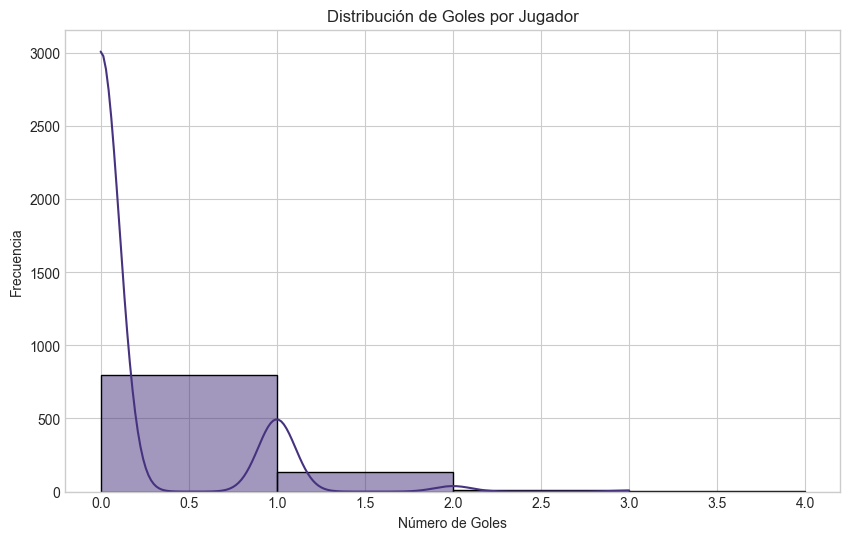

Top 10 Goleadores:


playerId
8717      6.0
4513      4.0
353833    4.0
7905      4.0
3322      4.0
3682      4.0
101669    3.0
25707     3.0
4338      3.0
21174     3.0
Name: goals_numeric, dtype: float64

In [21]:
# Ver la distribución de goles por jugador
if 'goals' in players_df.columns:
    # Primero veamos el tipo de datos de la columna
    print(f"Tipo de datos de la columna 'goals': {players_df['goals'].dtype}")
    
    # Intentamos convertir la columna a numérica si es posible
    try:
        # Convertir a numérico, errores como NaN
        goals_numeric = pd.to_numeric(players_df['goals'], errors='coerce')
        
        plt.figure(figsize=(10, 6))
        sns.histplot(goals_numeric.dropna(), kde=True, bins=range(0, int(goals_numeric.max())+2))
        plt.title('Distribución de Goles por Jugador')
        plt.xlabel('Número de Goles')
        plt.ylabel('Frecuencia')
        plt.show()
        
        # Top 10 goleadores
        # Creamos un DataFrame temporal con la columna convertida
        temp_df = players_df.copy()
        temp_df['goals_numeric'] = goals_numeric
        top_scorers = temp_df.groupby('playerId')['goals_numeric'].sum().sort_values(ascending=False).head(10)
        print("Top 10 Goleadores:")
        display(top_scorers)
    
    except Exception as e:
        print(f"Error al procesar la columna 'goals': {e}")
        
        # Mostremos algunos valores para entender el formato
        print("\nPrimeros 10 valores de la columna 'goals':")
        display(players_df['goals'].head(10))

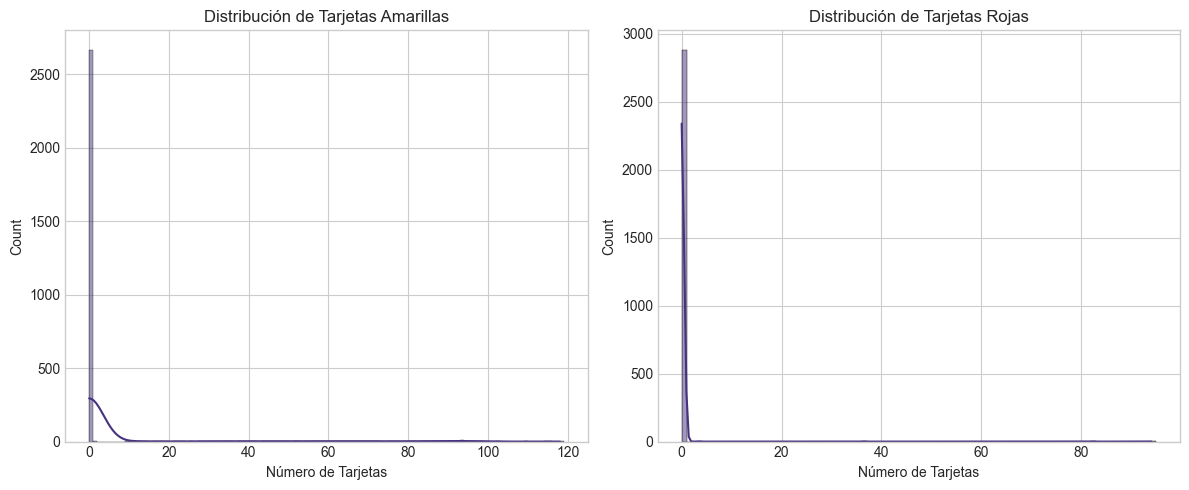


Estadísticas de Tarjetas Amarillas:
Total: 13474
Promedio por jugador: 4.67

Estadísticas de Tarjetas Rojas:
Total: 215
Promedio por jugador: 0.07


In [23]:
# Análisis de tarjetas
if all(col in players_df.columns for col in ['yellowCards', 'redCards']):
    # Convertir a numérico
    yellow_cards = pd.to_numeric(players_df['yellowCards'], errors='coerce')
    red_cards = pd.to_numeric(players_df['redCards'], errors='coerce')
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(yellow_cards.dropna(), kde=True, bins=range(0, int(yellow_cards.max())+2))
    plt.title('Distribución de Tarjetas Amarillas')
    plt.xlabel('Número de Tarjetas')
    
    plt.subplot(1, 2, 2)
    sns.histplot(red_cards.dropna(), kde=True, bins=range(0, int(red_cards.max())+2))
    plt.title('Distribución de Tarjetas Rojas')
    plt.xlabel('Número de Tarjetas')
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas de tarjetas
    print("\nEstadísticas de Tarjetas Amarillas:")
    print(f"Total: {yellow_cards.sum()}")
    print(f"Promedio por jugador: {yellow_cards.mean():.2f}")
    
    print("\nEstadísticas de Tarjetas Rojas:")
    print(f"Total: {red_cards.sum()}")
    print(f"Promedio por jugador: {red_cards.mean():.2f}")

### 1.4.4 Análisis por Equipo

Estadísticas por equipo:


,team_id,total_goles,promedio_goles,partidos_jugados
3,5629,16,2.285714,7
1,4418,14,2.000000,7
0,9598,12,1.714286,7
2,2413,12,1.714286,7
4,14358,10,2.000000,5
6,6380,8,1.600000,5
7,15670,7,1.400000,5
13,1598,7,1.750000,4
5,7047,6,1.200000,5
10,12913,6,1.500000,4


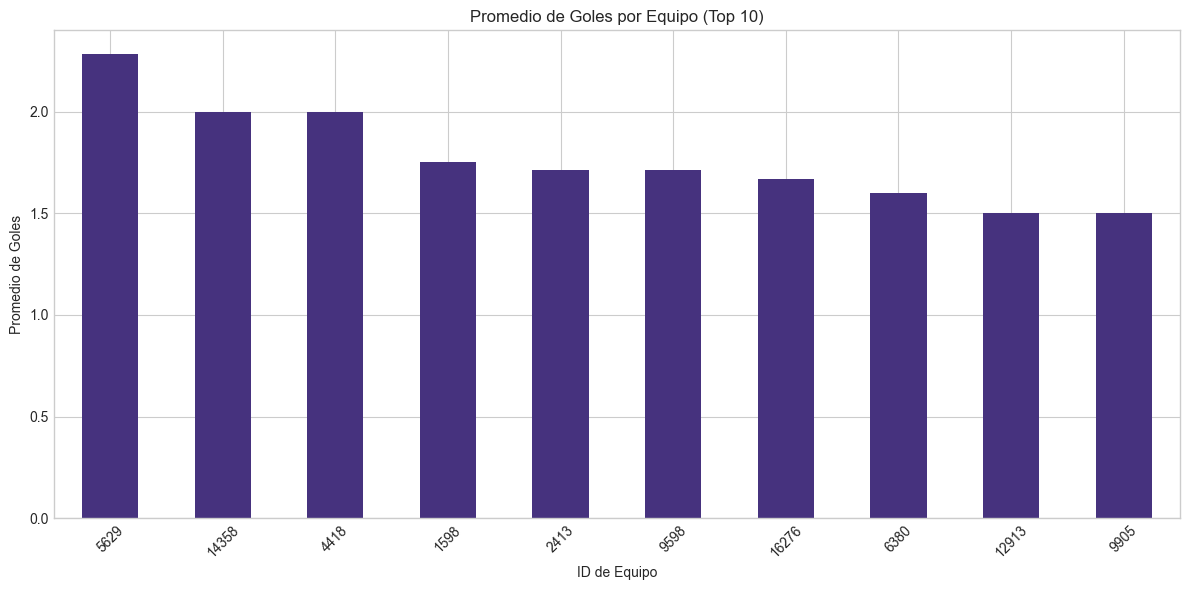

In [26]:
# Vamos a extraer la información de equipos del diccionario original
team_stats = {}

# Recorrer los datos originales para extraer información de equipos
if isinstance(data, list):
    for match in data:
        if 'teamsData' in match and isinstance(match['teamsData'], dict):
            for team_id, team_data in match['teamsData'].items():
                # Obtener información del equipo
                score = team_data.get('score', 0)
                
                # Inicializar si es un nuevo equipo
                if team_id not in team_stats:
                    team_stats[team_id] = {
                        'scores': [],
                        'matches': 0
                    }
                
                # Añadir datos
                team_stats[team_id]['scores'].append(score)
                team_stats[team_id]['matches'] += 1

# Convertir a DataFrame
teams_df = pd.DataFrame([
    {
        'team_id': team_id,
        'total_goles': sum(stats['scores']),
        'promedio_goles': sum(stats['scores']) / stats['matches'],
        'partidos_jugados': stats['matches']
    }
    for team_id, stats in team_stats.items()
])

# Mostrar estadísticas
if not teams_df.empty:
    teams_df = teams_df.sort_values('total_goles', ascending=False)
    print("Estadísticas por equipo:")
    display(teams_df.head(10))
    
    # Visualización
    plt.figure(figsize=(12, 6))
    teams_df.set_index('team_id')['promedio_goles'].sort_values(ascending=False).head(10).plot(kind='bar')
    plt.title('Promedio de Goles por Equipo (Top 10)')
    plt.ylabel('Promedio de Goles')
    plt.xlabel('ID de Equipo')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No se pudo extraer información de equipos")

## 1.5 Conclusiones y Próximos Pasos

En este notebook hemos explorado la estructura y contenido de los datos de partidos del Mundial. Hemos convertido los datos del archivo JSON a DataFrames para facilitar su análisis y explorado las principales características disponibles.

### Principales Hallazgos:
1. La estructura de los datos incluye información de partidos y jugadores, con estadísticas como goles, asistencias y tarjetas.
2. Cada partido tiene información sobre los equipos, jugadores titulares y suplentes.


### Próximos Pasos:
1. Limpieza de datos: Tratar valores faltantes y posibles inconsistencias.
2. Ingeniería de características: Crear métricas derivadas como ratios de eficiencia y estadísticas por 90 minutos.
3. Preparación para modelos: Dividir en conjuntos de entrenamiento y prueba.
4. Modelado: Implementar modelos de clasificación y clustering según lo planificado.